In [3]:
import langchain
from langchain.prompts import PromptTemplate
from langchain.llms import HuggingFacePipeline
from langchain.chains import SimpleSequentialChain
from langchain.chains import LLMChain
from transformers import pipeline

In [5]:
summarizer = pipeline('summarization', model = 'facebook/bart-large-cnn')
sumzrize_llm = HuggingFacePipeline(pipeline = summarizer)


model.safetensors:  12%|#1        | 189M/1.63G [00:00<?, ?B/s]

c:\Users\91995\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\91995\.cache\huggingface\hub\models--facebook--bart-large-cnn. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

c:\Users\91995\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
C:\Users\91995\AppData\Local\Temp\ipykernel_16420\1539101074.py:2: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFacePipeline`.
  sumzrize_llm = HuggingFacePipeline(pipeline = summarizer)


In [8]:
sentiment_classifier = pipeline("text-classification",model = "distilbert-base-uncased-finetuned-sst-2-english")
sentiment_llm = HuggingFacePipeline(pipeline = sentiment_classifier)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

c:\Users\91995\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [32]:
# Step 1: Create a short story or text
story = """
Once upon a time, in a small village, there lived a young girl named Ella. She was always kind and joyful, 
but one day, a storm destroyed her home. Filled with sadness, she wandered into the forest, 
seeking solace. In the deep woods, she found a mysterious creature that shared in her loneliness. 
As the days passed, Ella felt a growing bond with the creature, a mix of happiness and sorrow.
"""


In [58]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [39]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91995\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91995\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
summary_template = "Summarize this in around 120 words \n\n {story}\n\n"
summary_prompt = PromptTemplate(imput = ['story'],template = summary_template)
summarization_llm = pipeline("summarization", model="facebook/bart-large-cnn")
#summary_chain = LLMChain(llm=summarization_llm, prompt=summary_prompt)

c:\Users\91995\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [34]:
summary = summarization_llm(story,max_length = 125,min_length = 40,do_sample = False)[0]['summary_text']

Your max_length is set to 125, but your input_length is only 100. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


In [48]:
type(summary)

str

In [62]:
translator = str.maketrans(",",".",".,")
cleaned_sentence = summary.translate(translator)

In [63]:
tokens = word_tokenize(cleaned_sentence)
print(tokens)

['Ella', 'a', 'young', 'girl', 'was', 'left', 'homeless', 'after', 'a', 'storm', 'destroyed', 'her', 'home', 'She', 'found', 'solace', 'in', 'the', 'woods', 'where', 'she', 'met', 'a', 'mysterious', 'creature', 'The', 'pair', 'became', 'friends', 'and', 'Ella', 'grew', 'to', 'love', 'the', 'creature']


In [64]:
stop_words = set(stopwords.words('english'))
cleaned_tokens = [word for word in tokens if word not in stop_words]

In [65]:
print(cleaned_tokens)

['Ella', 'young', 'girl', 'left', 'homeless', 'storm', 'destroyed', 'home', 'She', 'found', 'solace', 'woods', 'met', 'mysterious', 'creature', 'The', 'pair', 'became', 'friends', 'Ella', 'grew', 'love', 'creature']


In [67]:
n = len(cleaned_tokens)
print(n)

23


In [68]:
e = []
for i in range(0,n):
    emotion_res = emotion_analyzer(cleaned_tokens[i])
    e.append(emotion_res)

In [ ]:
emotions = [(result['label'], result['score']) for result in emotion_res]
sorted_emo = sorted(emotions ,key=lambda x : x[1],reverse=True)
print("ranked emotions : ",sorted_emo)

ranked emotions :  [('disgust', 0.5358965396881104)]


In [36]:
emotions = [(result['label'], result['score']) for result in emotion_res]
sorted_emo = sorted(emotions ,key=lambda x : x[1],reverse=True)
print("ranked emotions : ",sorted_emo)

ranked emotions :  [('disgust', 0.5358965396881104)]


In [23]:
sentiment_classifier = pipeline('sentiment-analysis',model = "distilbert-base-uncased-finetuned-sst-2-english")
sentiment_llm = HuggingFacePipeline(pipeline = sentiment_classifier)

c:\Users\91995\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [21]:
sentiment_template = "Analyze the emotions of the following text excerpt \n\n {text} \n\n"
sentiment_prompt = PromptTemplate(input = ['text'],template = sentiment_template)
#sentiment_chain = LLMChain(llm = sentence_llm,prompt = sentiment_prompt)


In [24]:
emotional_profile = f"the emotional profile of the story is dominated by {sorted_emo[0][0]} with the score of {sorted_emo[0],[1]}"
print("Emotional Profile",emotional_profile)


Emotional Profile the emotional profile of the story is dominated by joy with the score of (('joy', 0.869041919708252), [1])


In [25]:
emotional_journey = f"the story begins with {sorted_emo[0][0]}"
print("The emotional journey of the story is as follows\n",emotional_journey)

The emotional journey of the story is as follows
 the story begins with joy


In [75]:
sorted_emot = sorted(e ,key = lambda x: x[0]['score'],reverse = True)
#sorted_emo = sorted(emotions ,key=lambda x : x[1],reverse=True)

In [77]:
labels = [x[0]['label'] for x in sorted_emot]
scores = [x[0]['score'] for x in sorted_emot]

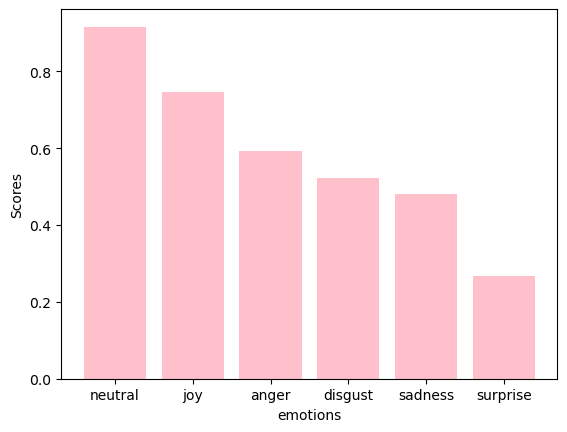

In [79]:
import matplotlib.pyplot as plt
plt.bar(labels,scores,color = 'pink')
plt.xlabel("emotions")
plt.ylabel("Scores")
plt.show()